## 讀取圖片
常見的套件:
1. skimage
2. PIL
3. OpenCV

# [教學目標]
- 示範其他的讀圖檔方式

# [範例重點]
- 用 skimage.io 讀取圖檔 (In[2], Out[2])
- 用 PIL.Image 讀取圖檔 (In[3], Out[3])
- 用 OpenCV 讀取圖檔 (In[4], Out[4])

In [47]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [48]:
import skimage.io as skio
img1 = skio.imread('data/examples/example.jpg')
plt.imshow(img1)
plt.show()

FileNotFoundError: No such file: 'c:\Users\10812182\Desktop\5\data\examples\example.jpg'

In [49]:
from PIL import Image
img2 = Image.open('data/examples/example.jpg') # 這時候還是 PIL object
img2 = np.array(img2)
plt.imshow(img2)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/examples/example.jpg'

In [50]:
import cv2
img3 = cv2.imread('data/examples/example.jpg')
plt.imshow(img3)
plt.show()

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

TypeError: Image data of dtype object cannot be converted to float

### 比較三種開圖方式的時間 - 比較讀取 1000 次

In [51]:
N_times = 1000

In [52]:
%%timeit
im = np.array([skio.imread('data/examples/example.jpg') for _ in range(N_times)])

FileNotFoundError: No such file: 'c:\Users\10812182\Desktop\5\data\examples\example.jpg'

In [53]:
%%timeit
im = np.array([np.array(Image.open('data/examples/example.jpg')) for _ in range(N_times)])

FileNotFoundError: [Errno 2] No such file or directory: 'data/examples/example.jpg'

In [54]:
%%timeit
im = np.array([cv2.cvtColor(cv2.imread('data/examples/example.jpg'), cv2.COLOR_BGR2RGB) for _ in range(N_times)])

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


## 將影像存成 mat

In [55]:
import scipy.io as sio
sio.savemat(file_name='data/examples/example.mat', mdict={'img': img1})

NameError: name 'img1' is not defined

In [56]:
mat_arr = sio.loadmat('data/examples/example.mat')
print(mat_arr.keys())

FileNotFoundError: [Errno 2] No such file or directory: 'data/examples/example.mat'

In [57]:
mat_arr = mat_arr['img']
print(mat_arr.shape)

NameError: name 'mat_arr' is not defined

In [58]:
plt.imshow(mat_arr)
plt.show()

NameError: name 'mat_arr' is not defined

# 練習時間

## 1-1 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

## 1-2 將所提供的 txt 轉成 pandas dataframe

## 2. 從所提供的 txt 中的連結讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [59]:
import requests
import pandas as pd
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 1. 取得連結資料

In [60]:
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'
response = requests.get(target_url)
# .text : 返回的是 Unicode型數據，一般適用於字串
data = response.text

In [61]:
data[0:5]

'n0001'

# 2. 轉換為pandas dataframe

In [62]:
# 以換行符號做分割
split_tag = '\n'
data = data.split(split_tag)
# 空的 array，放入重整後的資料 
arrange_data = []
for d in data:
    line = d.split("\t")
    arrange_data.append(line)
df = pd.DataFrame(arrange_data)

In [63]:
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


# 3. 顯示資料網址前五張圖片

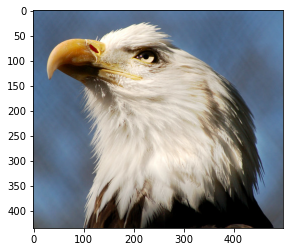

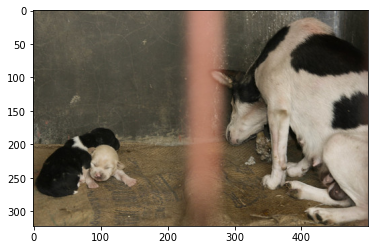

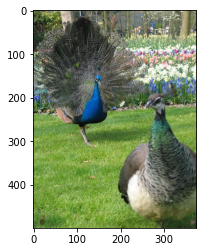

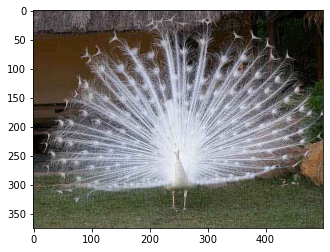

In [64]:


# 取得前五張圖片連結
result = img2arr_fromURLs(df[0:5][1].values)

for im_get in result:
    plt.imshow(im_get)
    plt.show()